1.Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

2.Data Collection and Preprocessing

In [ ]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')

In [ ]:
# Keras only takes numpy array
training_set = dataset_train.iloc[:, 1:2].values
training_set.shape

In [ ]:
sc = MinMaxScaler(feature_range=(0, 1))
# Fit: Get min/max of train data
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60: i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train.shape

In [ ]:
y_train.shape

In [ ]:
# Reshape X_train to be suitable for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape


3.Exploratory analysis

In [ ]:
plt.figure(figsize=(18, 8))
plt.plot(dataset_train['Open'])
plt.title("Google Stock Open Prices")
plt.xlabel("Time (oldest -> latest)")
plt.ylabel("Stock Open Price")
plt.show()


In [ ]:
plt.figure(figsize=(18, 8))
plt.plot(dataset_train['Low'])
plt.title("Google Stock Low Prices")
plt.xlabel("Time (oldest -> latest)")
plt.ylabel("Stock Lowest Price")
plt.show()


4.Model Creation and Fitting

In [ ]:
regressor = Sequential()

# First LSTM layer
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(rate=0.2))

# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(rate=0.2))

# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(rate=0.2))

# Fourth LSTM layer
regressor.add(LSTM(units=50, return_sequences=False))
regressor.add(Dropout(rate=0.2))

# Output Layer
regressor.add(Dense(units=1))


In [ ]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
regressor.fit(X_train, y_train, batch_size=32, epochs=100)


5.Model Evaluation

In [ ]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
dataset_test.head()


In [ ]:
# Keras only takes numpy array
real_stock_price = dataset_test.iloc[:, 1:2].values
real_stock_price.shape


In [ ]:
# Combine train and test datasets
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values


In [ ]:
# Reshape inputs to have 1 column
inputs = inputs.reshape(-1, 1)

# Scale input
inputs = sc.transform(inputs)


In [ ]:
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)

# Reshape X_test to match LSTM input shape
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

6.Model Prediction

In [ ]:
predicted_stock_price = regressor.predict(X_test)


In [ ]:
# Inverse the scaling to get real price values
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


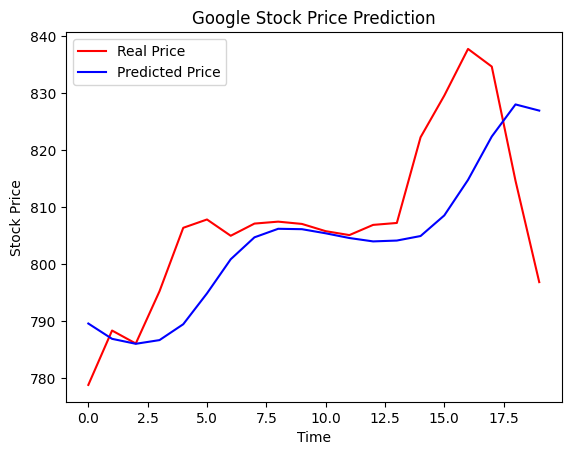

In [21]:
plt.plot(real_stock_price, color='red', label='Real Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Price')

plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
